In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4
I0 = -1.509460;

In [5]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.50946]

In [18]:
I0range = range( -1.509460, -1.509490, length = 2000 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [19]:
length(I0range)

2000

In [20]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.50946
parameter = -1.5094600150075037
parameter = -1.5094600300150076
parameter = -1.5094600450225113
parameter = -1.509460060030015
parameter = -1.5094600750375187
parameter = -1.5094600900450226
parameter = -1.5094601050525263
parameter = -1.50946012006003
parameter = -1.5094601350675338
parameter = -1.5094601500750375
parameter = -1.5094601650825412
parameter = -1.5094601800900451
parameter = -1.5094601950975488
parameter = -1.5094602101050525
parameter = -1.5094602251125562
parameter = -1.50946024012006
parameter = -1.5094602551275638
parameter = -1.5094602701350675
parameter = -1.5094602851425714
parameter = -1.509460300150075
parameter = -1.5094603151575787
parameter = -1.5094603301650826
parameter = -1.5094603451725863
parameter = -1.50946036018009
parameter = -1.509460375187594
parameter = -1.5094603901950976
parameter = -1.5094604052026013
parameter = -1.509460420210105
parameter = -1.5094604352176089
parameter = -1.5094604502251125
parameter = -1.50946046523261

parameter = -1.5094638869434718
parameter = -1.5094639019509755
parameter = -1.5094639169584791
parameter = -1.509463931965983
parameter = -1.5094639469734867
parameter = -1.5094639619809904
parameter = -1.5094639769884943
parameter = -1.509463991995998
parameter = -1.5094640070035017
parameter = -1.5094640220110056
parameter = -1.5094640370185093
parameter = -1.509464052026013
parameter = -1.5094640670335167
parameter = -1.5094640820410206
parameter = -1.5094640970485242
parameter = -1.509464112056028
parameter = -1.5094641270635318
parameter = -1.5094641420710355
parameter = -1.5094641570785392
parameter = -1.509464172086043
parameter = -1.5094641870935468
parameter = -1.5094642021010505
parameter = -1.5094642171085544
parameter = -1.509464232116058
parameter = -1.5094642471235618
parameter = -1.5094642621310654
parameter = -1.5094642771385693
parameter = -1.509464292146073
parameter = -1.5094643071535767
parameter = -1.5094643221610806
parameter = -1.5094643371685843
parameter = -1.

parameter = -1.509467743871936
parameter = -1.5094677588794396
parameter = -1.5094677738869435
parameter = -1.5094677888944472
parameter = -1.509467803901951
parameter = -1.5094678189094548
parameter = -1.5094678339169585
parameter = -1.5094678489244622
parameter = -1.509467863931966
parameter = -1.5094678789394698
parameter = -1.5094678939469734
parameter = -1.5094679089544771
parameter = -1.509467923961981
parameter = -1.5094679389694847
parameter = -1.5094679539769884
parameter = -1.5094679689844923
parameter = -1.509467983991996
parameter = -1.5094679989994997
parameter = -1.5094680140070036
parameter = -1.5094680290145073
parameter = -1.509468044022011
parameter = -1.5094680590295149
parameter = -1.5094680740370185
parameter = -1.5094680890445222
parameter = -1.509468104052026
parameter = -1.5094681190595298
parameter = -1.5094681340670335
parameter = -1.5094681490745372
parameter = -1.509468164082041
parameter = -1.5094681790895448
parameter = -1.5094681940970485
parameter = -1.5

parameter = -1.5094716308154077
parameter = -1.5094716458229114
parameter = -1.5094716608304153
parameter = -1.509471675837919
parameter = -1.5094716908454227
parameter = -1.5094717058529266
parameter = -1.5094717208604302
parameter = -1.509471735867934
parameter = -1.5094717508754376
parameter = -1.5094717658829415
parameter = -1.5094717808904452
parameter = -1.5094717958979489
parameter = -1.5094718109054528
parameter = -1.5094718259129565
parameter = -1.5094718409204602
parameter = -1.509471855927964
parameter = -1.5094718709354678
parameter = -1.5094718859429714
parameter = -1.5094719009504753
parameter = -1.509471915957979
parameter = -1.5094719309654827
parameter = -1.5094719459729864
parameter = -1.5094719609804903
parameter = -1.509471975987994
parameter = -1.5094719909954977
parameter = -1.5094720060030016
parameter = -1.5094720210105053
parameter = -1.509472036018009
parameter = -1.5094720510255129
parameter = -1.5094720660330165
parameter = -1.5094720810405202
parameter = -1

parameter = -1.5094755027513758
parameter = -1.5094755177588794
parameter = -1.5094755327663831
parameter = -1.509475547773887
parameter = -1.5094755627813907
parameter = -1.5094755777888944
parameter = -1.509475592796398
parameter = -1.509475607803902
parameter = -1.5094756228114057
parameter = -1.5094756378189094
parameter = -1.5094756528264133
parameter = -1.509475667833917
parameter = -1.5094756828414206
parameter = -1.5094756978489245
parameter = -1.5094757128564282
parameter = -1.509475727863932
parameter = -1.5094757428714358
parameter = -1.5094757578789395
parameter = -1.5094757728864432
parameter = -1.5094757878939469
parameter = -1.5094758029014508
parameter = -1.5094758179089545
parameter = -1.5094758329164581
parameter = -1.509475847923962
parameter = -1.5094758629314657
parameter = -1.5094758779389694
parameter = -1.5094758929464733
parameter = -1.509475907953977
parameter = -1.5094759229614807
parameter = -1.5094759379689844
parameter = -1.5094759529764883
parameter = -1.

parameter = -1.5094793746873436
parameter = -1.5094793896948475
parameter = -1.5094794047023512
parameter = -1.5094794197098549
parameter = -1.5094794347173586
parameter = -1.5094794497248625
parameter = -1.5094794647323662
parameter = -1.5094794797398698
parameter = -1.5094794947473738
parameter = -1.5094795097548774
parameter = -1.5094795247623811
parameter = -1.509479539769885
parameter = -1.5094795547773887
parameter = -1.5094795697848924
parameter = -1.5094795847923963
parameter = -1.5094795997999
parameter = -1.5094796148074037
parameter = -1.5094796298149074
parameter = -1.5094796448224113
parameter = -1.509479659829915
parameter = -1.5094796748374186
parameter = -1.5094796898449225
parameter = -1.5094797048524262
parameter = -1.50947971985993
parameter = -1.5094797348674338
parameter = -1.5094797498749375
parameter = -1.5094797648824412
parameter = -1.5094797798899449
parameter = -1.5094797948974488
parameter = -1.5094798099049525
parameter = -1.5094798249124561
parameter = -1.

parameter = -1.5094832466233117
parameter = -1.5094832616308154
parameter = -1.509483276638319
parameter = -1.509483291645823
parameter = -1.5094833066533266
parameter = -1.5094833216608303
parameter = -1.5094833366683342
parameter = -1.509483351675838
parameter = -1.5094833666833416
parameter = -1.5094833816908455
parameter = -1.5094833966983492
parameter = -1.5094834117058529
parameter = -1.5094834267133568
parameter = -1.5094834417208605
parameter = -1.5094834567283641
parameter = -1.5094834717358678
parameter = -1.5094834867433717
parameter = -1.5094835017508754
parameter = -1.509483516758379
parameter = -1.509483531765883
parameter = -1.5094835467733867
parameter = -1.5094835617808904
parameter = -1.5094835767883943
parameter = -1.509483591795898
parameter = -1.5094836068034017
parameter = -1.5094836218109056
parameter = -1.5094836368184092
parameter = -1.509483651825913
parameter = -1.5094836668334166
parameter = -1.5094836818409205
parameter = -1.5094836968484242
parameter = -1.

parameter = -1.5094871035517758
parameter = -1.5094871185592798
parameter = -1.5094871335667834
parameter = -1.5094871485742871
parameter = -1.5094871635817908
parameter = -1.5094871785892947
parameter = -1.5094871935967984
parameter = -1.509487208604302
parameter = -1.509487223611806
parameter = -1.5094872386193097
parameter = -1.5094872536268134
parameter = -1.5094872686343173
parameter = -1.509487283641821
parameter = -1.5094872986493246
parameter = -1.5094873136568283
parameter = -1.5094873286643322
parameter = -1.509487343671836
parameter = -1.5094873586793396
parameter = -1.5094873736868435
parameter = -1.5094873886943472
parameter = -1.5094874037018509
parameter = -1.5094874187093548
parameter = -1.5094874337168585
parameter = -1.5094874487243621
parameter = -1.509487463731866
parameter = -1.5094874787393697
parameter = -1.5094874937468734
parameter = -1.509487508754377
parameter = -1.509487523761881
parameter = -1.5094875387693847
parameter = -1.5094875537768884
parameter = -1.

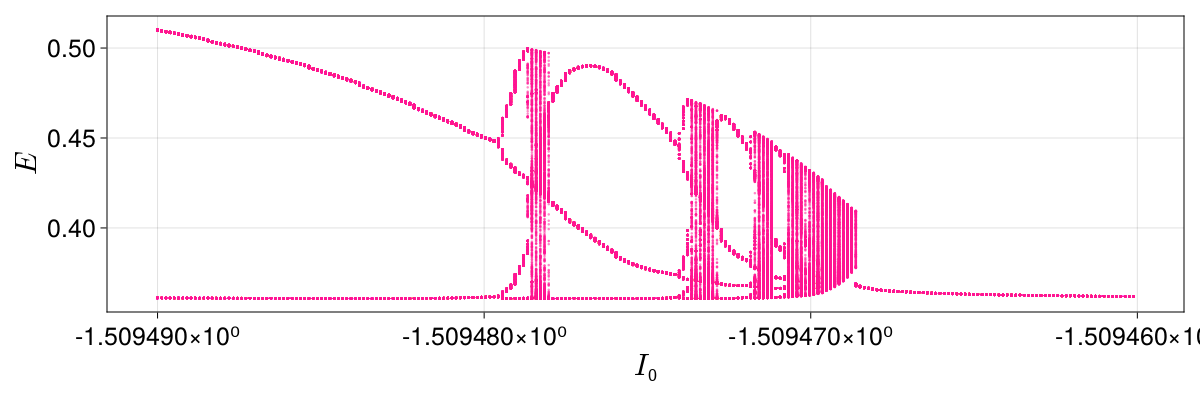

In [34]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("deeppink", 0.5), markersize = 2.5)
end
f

In [27]:
save("E_right_space_2000_dots.jld", "data", output)